In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [6]:
x = np.array(train.drop('label' , axis = 1))/255
y = np.array(train['label'])

In [8]:
x = x.reshape((-1 , 28 , 28 , 1))

In [9]:
train_X , val_X , train_y , val_y = train_test_split(x , y , test_size = 0.2)

In [10]:
datagen = ImageDataGenerator(rotation_range = 12,
                            height_shift_range = 0.12,
                            width_shift_range = 0.12,
                            shear_range = 0.12,
                            zoom_range = 0.12,
                            validation_split = 0.2)

In [11]:
train_generator = datagen.flow(train_X , train_y , batch_size = 32 , subset = 'training')

val_generator = datagen.flow(val_X , val_y , batch_size = 32 , subset = 'validation')

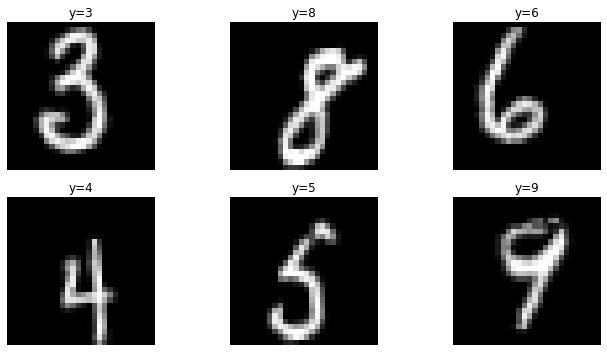

In [17]:
plt.figure(figsize = (10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in train_generator:
        plt.imshow((x[0]/255).reshape(28,28),cmap='gray')
        plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

In [22]:
model = keras.Sequential([
    
    layers.Conv2D(32, (3,3), input_shape = (28,28,1), padding = 'same', activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.3),
    
    layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.3),
    
    layers.Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.3),
    
    layers.Conv2D(256, (3,3), activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.5),
    
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation = 'softmax')
])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_21 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)         

In [23]:
model.compile(optimizer = 'adam', 
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['acc'])

In [25]:
history = model.fit_generator(train_generator , epochs = 100 , 
                              validation_data = val_generator)

Epoch 1/100
840/840 [==============================] - 11s 13ms/step - loss: 1.7628 - acc: 0.7057 - val_loss: 1.5419 - val_acc: 0.9226
Epoch 2/100
840/840 [==============================] - 10s 12ms/step - loss: 1.5537 - acc: 0.9127 - val_loss: 1.5515 - val_acc: 0.9113
Epoch 3/100
840/840 [==============================] - 10s 12ms/step - loss: 1.5356 - acc: 0.9281 - val_loss: 1.4883 - val_acc: 0.9738
Epoch 4/100
840/840 [==============================] - 11s 13ms/step - loss: 1.5235 - acc: 0.9395 - val_loss: 1.4920 - val_acc: 0.9696
Epoch 5/100
840/840 [==============================] - 11s 13ms/step - loss: 1.5153 - acc: 0.9470 - val_loss: 1.4832 - val_acc: 0.9792
Epoch 6/100
840/840 [==============================] - 10s 12ms/step - loss: 1.5149 - acc: 0.9477 - val_loss: 1.4810 - val_acc: 0.9798
Epoch 7/100
840/840 [==============================] - 11s 13ms/step - loss: 1.5098 - acc: 0.9520 - val_loss: 1.4800 - val_acc: 0.9833
Epoch 8/100
840/840 [==============================] - 

840/840 [==============================] - 10s 12ms/step - loss: 1.4861 - acc: 0.9751 - val_loss: 1.4697 - val_acc: 0.9917
Epoch 62/100
840/840 [==============================] - 11s 14ms/step - loss: 1.4875 - acc: 0.9737 - val_loss: 1.4690 - val_acc: 0.9923
Epoch 63/100
840/840 [==============================] - 10s 12ms/step - loss: 1.4852 - acc: 0.9759 - val_loss: 1.4722 - val_acc: 0.9887
Epoch 64/100
840/840 [==============================] - 10s 12ms/step - loss: 1.4848 - acc: 0.9763 - val_loss: 1.4691 - val_acc: 0.9923
Epoch 65/100
840/840 [==============================] - 10s 12ms/step - loss: 1.4863 - acc: 0.9747 - val_loss: 1.4711 - val_acc: 0.9905
Epoch 66/100
840/840 [==============================] - 11s 13ms/step - loss: 1.4858 - acc: 0.9752 - val_loss: 1.4693 - val_acc: 0.9917
Epoch 67/100
840/840 [==============================] - 11s 13ms/step - loss: 1.4853 - acc: 0.9759 - val_loss: 1.4700 - val_acc: 0.9917
Epoch 68/100
840/840 [==============================] - 11s 1

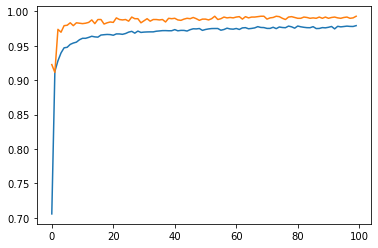

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

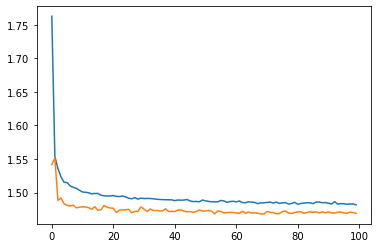

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [29]:
model.evaluate(val_X , val_y)

263/263 [==============================] - 1s 2ms/step - loss: 1.4690 - acc: 0.9921


[1.4690247774124146, 0.9921428561210632]

In [30]:
test_data = np.array(test).reshape(-1 , 28 , 28 , 1)

In [31]:
predictions = model.predict_classes(test_data)

In [35]:
submission = pd.DataFrame({'ImageId':range(1,len(predictions)+1),'Label':predictions})

submission.to_csv('submission.csv' , index = False)